In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot


features_for_mood = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

# Load Data

In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df['label'].value_counts()

sad           100
chillhop      100
tired         100
work          100
missed        100
discourage    100
cry           100
chillout       80
sea            80
lovesong       60
Name: label, dtype: int64

# **3 label : chillhop,sad,sea (avg acc 72-79%)**

In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'cry']
df = df[df.label != 'work']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']

In [ ]:
df['label'].value_counts()

sad         100
chillhop    100
sea          80
Name: label, dtype: int64

## Scaled Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(196, 10)

In [ ]:
X_test.shape

(84, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
74,0.683,0.410,6,-9.448,0,0.0261,0.000008,0.111,0.0772,100.025
341,0.714,0.804,11,-6.271,1,0.0713,0.000001,0.320,0.7310,93.033
65,0.629,0.763,2,-5.470,1,0.0744,0.000000,0.176,0.8090,146.012
256,0.727,0.564,0,-8.480,1,0.0801,0.000000,0.284,0.2710,110.064
347,0.681,0.822,7,-6.090,1,0.0737,0.000022,0.300,0.8590,95.978


In [ ]:
y_train.head()

,label
74,sad
341,sea
65,sad
256,chillhop
347,sea


In [ ]:
y_train.value_counts()

label   
chillhop    70
sad         70
sea         56
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
sad         30
sea         24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.7261904761904762

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

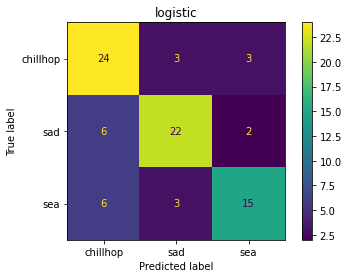

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.67      0.80      0.73        30
         sad       0.79      0.73      0.76        30
         sea       0.75      0.62      0.68        24

    accuracy                           0.73        84
   macro avg       0.73      0.72      0.72        84
weighted avg       0.73      0.73      0.73        84



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.7738095238095238

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

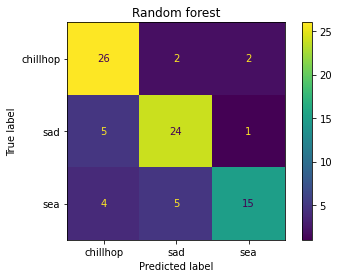

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.74      0.87      0.80        30
         sad       0.77      0.80      0.79        30
         sea       0.83      0.62      0.71        24

    accuracy                           0.77        84
   macro avg       0.78      0.76      0.77        84
weighted avg       0.78      0.77      0.77        84



### XGBoost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test,y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.76%


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'XGBoost')

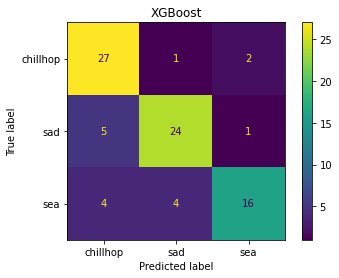

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("XGBoost")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.75      0.90      0.82        30
         sad       0.83      0.80      0.81        30
         sea       0.84      0.67      0.74        24

    accuracy                           0.80        84
   macro avg       0.81      0.79      0.79        84
weighted avg       0.80      0.80      0.80        84



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6547619047619048


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

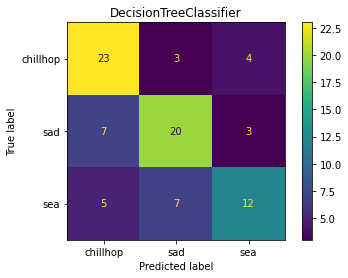

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.66      0.77      0.71        30
         sad       0.67      0.67      0.67        30
         sea       0.63      0.50      0.56        24

    accuracy                           0.65        84
   macro avg       0.65      0.64      0.64        84
weighted avg       0.65      0.65      0.65        84



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.730 (0.080)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

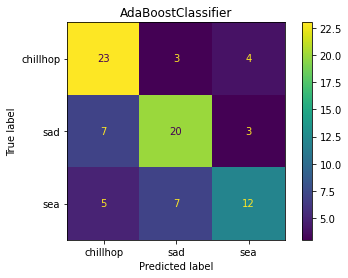

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.66      0.77      0.71        30
         sad       0.67      0.67      0.67        30
         sea       0.63      0.50      0.56        24

    accuracy                           0.65        84
   macro avg       0.65      0.64      0.64        84
weighted avg       0.65      0.65      0.65        84



# **3 label : work,sad,sea (avg acc %)**

In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'cry']
#df = df[df.label != 'work']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
#df = df[df.label != 'sad']
#df = df[df.label != 'sea']
df = df[df.label != 'chillhop']
df = df[df.label != 'lovesong']

In [ ]:
df['label'].value_counts()

sad     100
work    100
sea      80
Name: label, dtype: int64

## Scaled Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(196, 10)

In [ ]:
X_test.shape

(84, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
467,0.638,0.193,9,-12.366,1,0.0357,0.000000,0.3160,0.550,140.118
483,0.822,0.678,0,-3.494,1,0.0341,0.000003,0.0975,0.535,83.497
519,0.505,0.596,4,-7.027,1,0.0410,0.000000,0.2610,0.335,167.517
76,0.672,0.557,11,-7.973,1,0.0376,0.000000,0.2000,0.550,129.970
534,0.832,0.632,1,-6.982,1,0.0423,0.000000,0.1090,0.830,102.992


In [ ]:
y_train.head()

,label
467,work
483,work
519,work
76,sad
534,work


In [ ]:
y_train.value_counts()

label
sad      70
work     70
sea      56
dtype: int64

In [ ]:
y_test.value_counts()

label
sad      30
work     30
sea      24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.5

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['sad', 'sea', 'work'], dtype='<U4')

Text(0.5, 1.0, 'logistic')

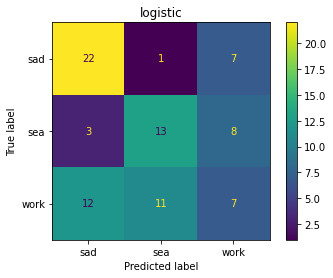

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         sad       0.59      0.73      0.66        30
         sea       0.52      0.54      0.53        24
        work       0.32      0.23      0.27        30

    accuracy                           0.50        84
   macro avg       0.48      0.50      0.49        84
weighted avg       0.47      0.50      0.48        84



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.5119047619047619

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['sad', 'sea', 'work'], dtype='<U4')

Text(0.5, 1.0, 'Random forest')

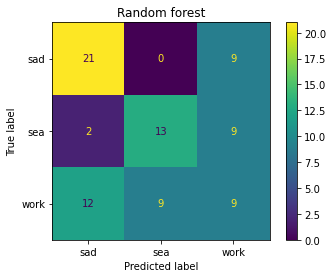

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         sad       0.60      0.70      0.65        30
         sea       0.59      0.54      0.57        24
        work       0.33      0.30      0.32        30

    accuracy                           0.51        84
   macro avg       0.51      0.51      0.51        84
weighted avg       0.50      0.51      0.51        84



### XGBoost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test,y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 51.19%


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['sad', 'sea', 'work'], dtype='<U4')

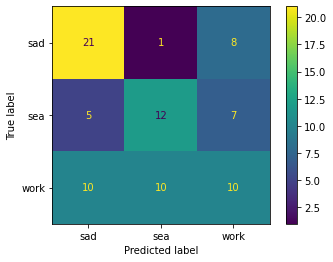

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         sad       0.58      0.70      0.64        30
         sea       0.52      0.50      0.51        24
        work       0.40      0.33      0.36        30

    accuracy                           0.51        84
   macro avg       0.50      0.51      0.50        84
weighted avg       0.50      0.51      0.50        84



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.39285714285714285


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['sad', 'sea', 'work'], dtype='<U4')

Text(0.5, 1.0, 'DecisionTreeClassifier')

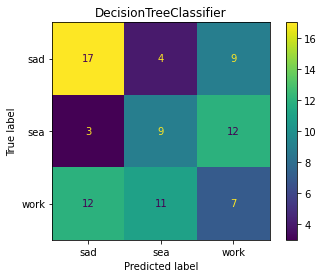

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         sad       0.53      0.57      0.55        30
         sea       0.38      0.38      0.38        24
        work       0.25      0.23      0.24        30

    accuracy                           0.39        84
   macro avg       0.39      0.39      0.39        84
weighted avg       0.39      0.39      0.39        84



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.481 (0.091)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['sad', 'sea', 'work'], dtype='<U4')

Text(0.5, 1.0, 'AdaBoostClassifier')

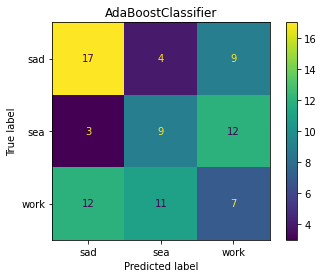

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         sad       0.53      0.57      0.55        30
         sea       0.38      0.38      0.38        24
        work       0.25      0.23      0.24        30

    accuracy                           0.39        84
   macro avg       0.39      0.39      0.39        84
weighted avg       0.39      0.39      0.39        84



# **4 label : chillhop,sad,sea,missed (avg accuracy 52-59%)**

In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'cry']
df = df[df.label != 'work']
#df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']

In [ ]:
df['label'].value_counts()

sad         100
chillhop    100
missed      100
sea          80
Name: label, dtype: int64

## Scaled Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(266, 10)

In [ ]:
X_test.shape

(114, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
228,0.744,0.348,2,-15.550,1,0.0338,0.000008,0.1170,0.7530,86.992
331,0.877,0.397,0,-8.148,1,0.1160,0.000000,0.1720,0.4940,94.032
320,0.713,0.497,11,-7.418,0,0.0310,0.000025,0.0498,0.8920,91.000
74,0.683,0.410,6,-9.448,0,0.0261,0.000008,0.1110,0.0772,100.025
646,0.467,0.639,10,-6.594,1,0.0355,0.000024,0.1090,0.2580,123.907


In [ ]:
y_train.head()

,label
228,chillhop
331,sea
320,sea
74,sad
646,missed


In [ ]:
y_train.value_counts()

label   
chillhop    70
missed      70
sad         70
sea         56
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
missed      30
sad         30
sea         24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.5263157894736842

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'missed', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

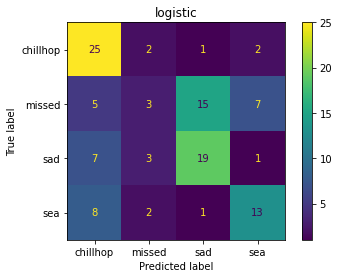

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.56      0.83      0.67        30
      missed       0.30      0.10      0.15        30
         sad       0.53      0.63      0.58        30
         sea       0.57      0.54      0.55        24

    accuracy                           0.53       114
   macro avg       0.49      0.53      0.49       114
weighted avg       0.48      0.53      0.48       114



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.5614035087719298

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'missed', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

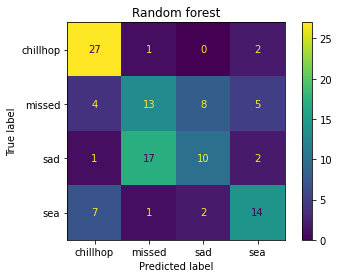

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.69      0.90      0.78        30
      missed       0.41      0.43      0.42        30
         sad       0.50      0.33      0.40        30
         sea       0.61      0.58      0.60        24

    accuracy                           0.56       114
   macro avg       0.55      0.56      0.55       114
weighted avg       0.55      0.56      0.55       114



### XGBoost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test,y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.63%


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'missed', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'XGBoost')

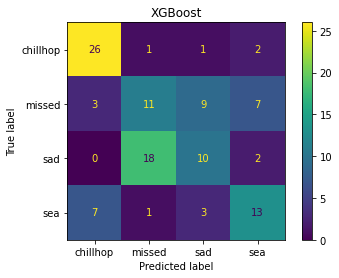

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("XGBoost")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.72      0.87      0.79        30
      missed       0.35      0.37      0.36        30
         sad       0.43      0.33      0.38        30
         sea       0.54      0.54      0.54        24

    accuracy                           0.53       114
   macro avg       0.51      0.53      0.52       114
weighted avg       0.51      0.53      0.52       114



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.47368421052631576


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'missed', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

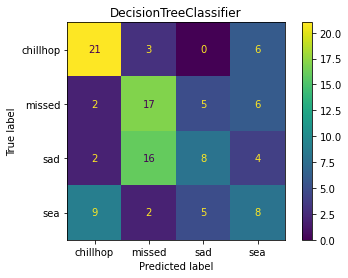

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.62      0.70      0.66        30
      missed       0.45      0.57      0.50        30
         sad       0.44      0.27      0.33        30
         sea       0.33      0.33      0.33        24

    accuracy                           0.47       114
   macro avg       0.46      0.47      0.46       114
weighted avg       0.47      0.47      0.46       114



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.504 (0.077)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'missed', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

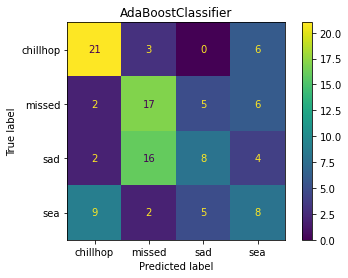

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.62      0.70      0.66        30
      missed       0.45      0.57      0.50        30
         sad       0.44      0.27      0.33        30
         sea       0.33      0.33      0.33        24

    accuracy                           0.47       114
   macro avg       0.46      0.47      0.46       114
weighted avg       0.47      0.47      0.46       114



# **4 label : chillhop,sad,sea,tired (avg accuracy 49-57%)**

In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
#df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'cry']
df = df[df.label != 'work']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']

In [ ]:
df['label'].value_counts()

sad         100
chillhop    100
tired       100
sea          80
Name: label, dtype: int64

## Scaled Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(266, 10)

In [ ]:
X_test.shape

(114, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
410,0.689,0.499,9,-7.029,1,0.0690,0.000000,0.285,0.413,140.009
184,0.898,0.478,0,-8.890,0,0.0379,0.000158,0.111,0.420,110.986
361,0.631,0.567,6,-8.274,1,0.0412,0.000016,0.366,0.329,77.016
442,0.705,0.746,1,-5.030,1,0.0416,0.000020,0.194,0.539,99.993
227,0.803,0.491,0,-9.950,0,0.0712,0.000000,0.145,0.490,123.911


In [ ]:
y_train.head()

,label
410,tired
184,chillhop
361,tired
442,tired
227,chillhop


In [ ]:
y_train.value_counts()

label   
chillhop    70
sad         70
tired       70
sea         56
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
sad         30
tired       30
sea         24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.5263157894736842

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea', 'tired'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

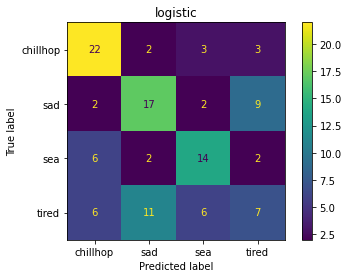

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.61      0.73      0.67        30
         sad       0.53      0.57      0.55        30
         sea       0.56      0.58      0.57        24
       tired       0.33      0.23      0.27        30

    accuracy                           0.53       114
   macro avg       0.51      0.53      0.52       114
weighted avg       0.51      0.53      0.51       114



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.5701754385964912

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea', 'tired'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

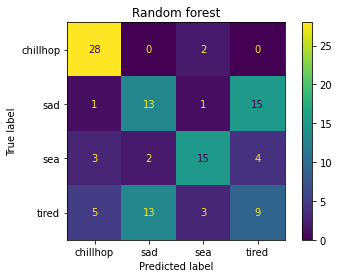

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.76      0.93      0.84        30
         sad       0.46      0.43      0.45        30
         sea       0.71      0.62      0.67        24
       tired       0.32      0.30      0.31        30

    accuracy                           0.57       114
   macro avg       0.56      0.57      0.57       114
weighted avg       0.56      0.57      0.56       114



### XGBoost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test,y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 49.12%


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea', 'tired'], dtype='<U8')

Text(0.5, 1.0, 'XGBoost')

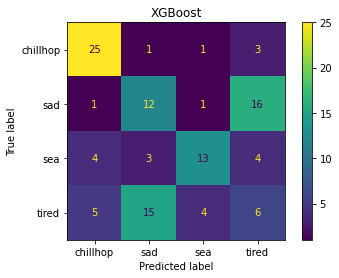

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("XGBoost")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.71      0.83      0.77        30
         sad       0.39      0.40      0.39        30
         sea       0.68      0.54      0.60        24
       tired       0.21      0.20      0.20        30

    accuracy                           0.49       114
   macro avg       0.50      0.49      0.49       114
weighted avg       0.49      0.49      0.49       114



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.45614035087719296


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea', 'tired'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

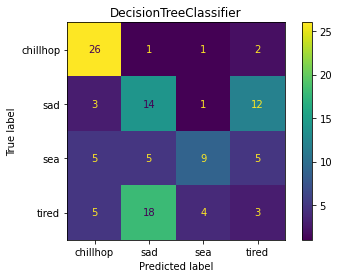

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.67      0.87      0.75        30
         sad       0.37      0.47      0.41        30
         sea       0.60      0.38      0.46        24
       tired       0.14      0.10      0.12        30

    accuracy                           0.46       114
   macro avg       0.44      0.45      0.44       114
weighted avg       0.43      0.46      0.43       114



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.491 (0.071)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea', 'tired'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

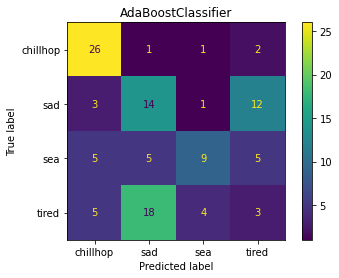

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.67      0.87      0.75        30
         sad       0.37      0.47      0.41        30
         sea       0.60      0.38      0.46        24
       tired       0.14      0.10      0.12        30

    accuracy                           0.46       114
   macro avg       0.44      0.45      0.44       114
weighted avg       0.43      0.46      0.43       114



# **4 label : chillhop,sad,sea,chillout (avg accuracy 64-68%)**

In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'cry']
df = df[df.label != 'work']
df = df[df.label != 'missed']
#df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']

In [ ]:
df['label'].value_counts()

sad         100
chillhop    100
chillout     80
sea          80
Name: label, dtype: int64

## Scaled Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(252, 10)

In [ ]:
X_test.shape

(108, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
283,0.715,0.309,10,-11.412,1,0.0417,0.000001,0.1010,0.651,93.006
128,0.734,0.370,8,-8.557,1,0.0425,0.000358,0.1050,0.533,92.237
256,0.727,0.564,0,-8.480,1,0.0801,0.000000,0.2840,0.271,110.064
230,0.795,0.424,0,-11.639,0,0.0379,0.000044,0.0809,0.419,130.023
341,0.714,0.804,11,-6.271,1,0.0713,0.000001,0.3200,0.731,93.033


In [ ]:
y_train.head()

,label
283,sea
128,chillout
256,chillhop
230,chillhop
341,sea


In [ ]:
y_train.value_counts()

label   
chillhop    70
sad         70
chillout    56
sea         56
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
sad         30
chillout    24
sea         24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.6481481481481481

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'chillout', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

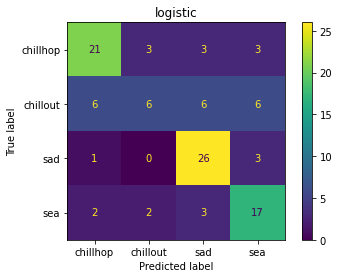

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.70      0.70      0.70        30
    chillout       0.55      0.25      0.34        24
         sad       0.68      0.87      0.76        30
         sea       0.59      0.71      0.64        24

    accuracy                           0.65       108
   macro avg       0.63      0.63      0.61       108
weighted avg       0.64      0.65      0.63       108



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.6759259259259259

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'chillout', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

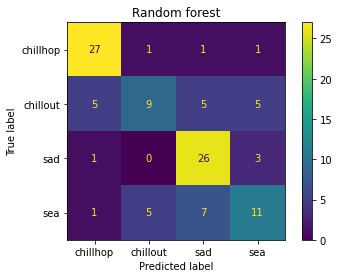

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.79      0.90      0.84        30
    chillout       0.60      0.38      0.46        24
         sad       0.67      0.87      0.75        30
         sea       0.55      0.46      0.50        24

    accuracy                           0.68       108
   macro avg       0.65      0.65      0.64       108
weighted avg       0.66      0.68      0.66       108



### XGBoost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test,y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.81%


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'chillout', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'XGBoost')

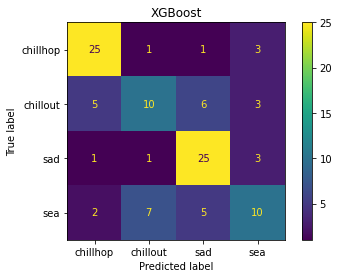

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("XGBoost")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.76      0.83      0.79        30
    chillout       0.53      0.42      0.47        24
         sad       0.68      0.83      0.75        30
         sea       0.53      0.42      0.47        24

    accuracy                           0.65       108
   macro avg       0.62      0.62      0.62       108
weighted avg       0.63      0.65      0.63       108



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6018518518518519


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'chillout', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

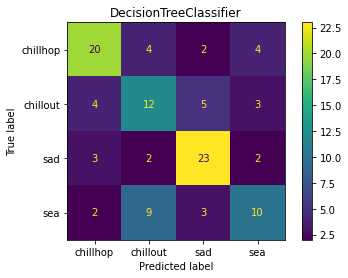

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.69      0.67      0.68        30
    chillout       0.44      0.50      0.47        24
         sad       0.70      0.77      0.73        30
         sea       0.53      0.42      0.47        24

    accuracy                           0.60       108
   macro avg       0.59      0.59      0.59       108
weighted avg       0.60      0.60      0.60       108



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.540 (0.061)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'chillout', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

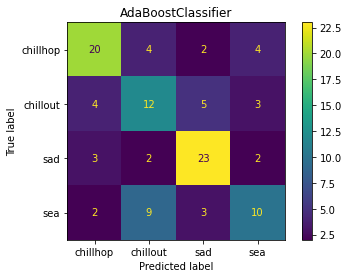

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.69      0.67      0.68        30
    chillout       0.44      0.50      0.47        24
         sad       0.70      0.77      0.73        30
         sea       0.53      0.42      0.47        24

    accuracy                           0.60       108
   macro avg       0.59      0.59      0.59       108
weighted avg       0.60      0.60      0.60       108



# **4 label : chillhop,sad,sea,lovesong (avg accuracy 63-68%)**

In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'cry']
df = df[df.label != 'work']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
#df = df[df.label != 'lovesong']

In [ ]:
df['label'].value_counts()

sad         100
chillhop    100
sea          80
lovesong     60
Name: label, dtype: int64

## Scaled Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(238, 10)

In [ ]:
X_test.shape

(102, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
803,0.702,0.694,0,-7.306,1,0.0243,0.579000,0.2700,0.905,129.990
338,0.565,0.607,3,-10.643,1,0.0361,0.000000,0.1050,0.784,204.050
227,0.803,0.491,0,-9.950,0,0.0712,0.000000,0.1450,0.490,123.911
356,0.795,0.512,9,-8.999,1,0.0280,0.000001,0.2160,0.835,100.050
344,0.790,0.625,4,-5.452,1,0.0738,0.000000,0.0821,0.906,109.051


In [ ]:
y_train.head()

,label
803,lovesong
338,sea
227,chillhop
356,sea
344,sea


In [ ]:
y_train.value_counts()

label   
chillhop    70
sad         70
sea         56
lovesong    42
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
sad         30
sea         24
lovesong    18
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.6372549019607843

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'lovesong', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

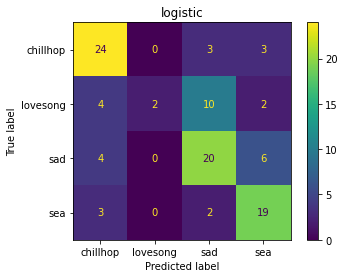

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.69      0.80      0.74        30
    lovesong       1.00      0.11      0.20        18
         sad       0.57      0.67      0.62        30
         sea       0.63      0.79      0.70        24

    accuracy                           0.64       102
   macro avg       0.72      0.59      0.56       102
weighted avg       0.70      0.64      0.60       102



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.6666666666666666

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'lovesong', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

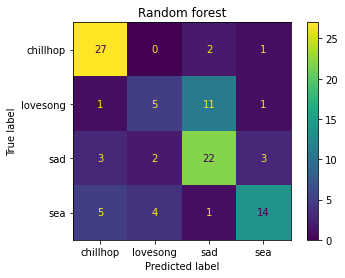

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.75      0.90      0.82        30
    lovesong       0.45      0.28      0.34        18
         sad       0.61      0.73      0.67        30
         sea       0.74      0.58      0.65        24

    accuracy                           0.67       102
   macro avg       0.64      0.62      0.62       102
weighted avg       0.65      0.67      0.65       102



### XGBoost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test,y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.67%


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'lovesong', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'XGBoost')

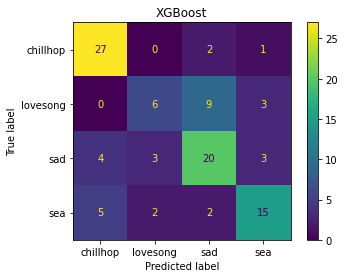

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("XGBoost")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.75      0.90      0.82        30
    lovesong       0.55      0.33      0.41        18
         sad       0.61      0.67      0.63        30
         sea       0.68      0.62      0.65        24

    accuracy                           0.67       102
   macro avg       0.65      0.63      0.63       102
weighted avg       0.66      0.67      0.65       102



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5392156862745098


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'lovesong', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

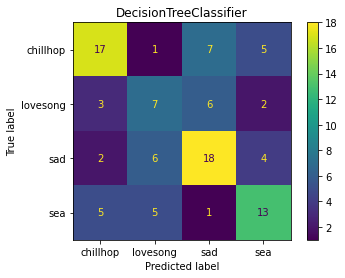

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.63      0.57      0.60        30
    lovesong       0.37      0.39      0.38        18
         sad       0.56      0.60      0.58        30
         sea       0.54      0.54      0.54        24

    accuracy                           0.54       102
   macro avg       0.53      0.52      0.52       102
weighted avg       0.54      0.54      0.54       102



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.584 (0.059)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'lovesong', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

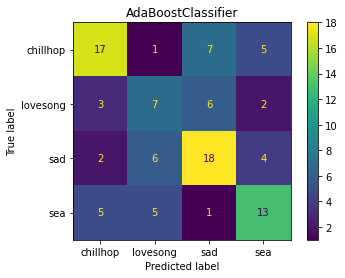

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.63      0.57      0.60        30
    lovesong       0.37      0.39      0.38        18
         sad       0.56      0.60      0.58        30
         sea       0.54      0.54      0.54        24

    accuracy                           0.54       102
   macro avg       0.53      0.52      0.52       102
weighted avg       0.54      0.54      0.54       102



# **4 label : chillhop,sad,sea,cry (avg accuracy 42-52%)**

In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
#df = df[df.label != 'cry']
df = df[df.label != 'work']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']

In [ ]:
df['label'].value_counts()

sad         100
chillhop    100
cry         100
sea          80
Name: label, dtype: int64

## Scaled Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(266, 10)

In [ ]:
X_test.shape

(114, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
228,0.744,0.348,2,-15.550,1,0.0338,0.000008,0.1170,0.7530,86.992
331,0.877,0.397,0,-8.148,1,0.1160,0.000000,0.1720,0.4940,94.032
320,0.713,0.497,11,-7.418,0,0.0310,0.000025,0.0498,0.8920,91.000
74,0.683,0.410,6,-9.448,0,0.0261,0.000008,0.1110,0.0772,100.025
906,0.630,0.479,11,-7.371,1,0.0298,0.000000,0.0879,0.4600,140.120


In [ ]:
y_train.head()

,label
228,chillhop
331,sea
320,sea
74,sad
906,cry


In [ ]:
y_train.value_counts()

label   
chillhop    70
cry         70
sad         70
sea         56
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
cry         30
sad         30
sea         24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.49122807017543857

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

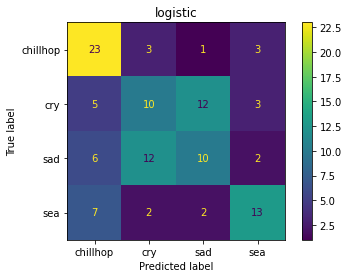

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.56      0.77      0.65        30
         cry       0.37      0.33      0.35        30
         sad       0.40      0.33      0.36        30
         sea       0.62      0.54      0.58        24

    accuracy                           0.49       114
   macro avg       0.49      0.49      0.49       114
weighted avg       0.48      0.49      0.48       114



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.5614035087719298

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

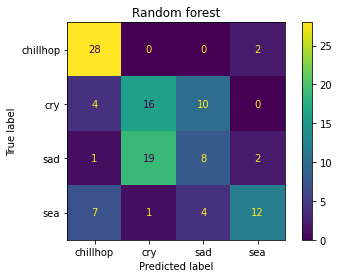

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.70      0.93      0.80        30
         cry       0.44      0.53      0.48        30
         sad       0.36      0.27      0.31        30
         sea       0.75      0.50      0.60        24

    accuracy                           0.56       114
   macro avg       0.56      0.56      0.55       114
weighted avg       0.55      0.56      0.55       114



### XGBoost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test,y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.63%


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'XGBoost')

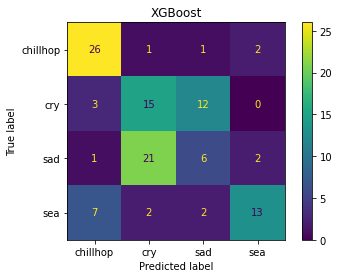

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("XGBoost")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.70      0.87      0.78        30
         cry       0.38      0.50      0.43        30
         sad       0.29      0.20      0.24        30
         sea       0.76      0.54      0.63        24

    accuracy                           0.53       114
   macro avg       0.53      0.53      0.52       114
weighted avg       0.52      0.53      0.51       114



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.38596491228070173


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

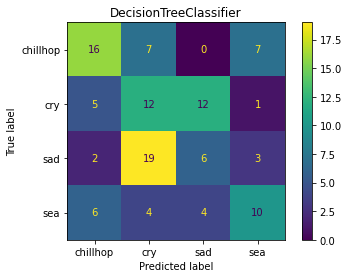

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.55      0.53      0.54        30
         cry       0.29      0.40      0.33        30
         sad       0.27      0.20      0.23        30
         sea       0.48      0.42      0.44        24

    accuracy                           0.39       114
   macro avg       0.40      0.39      0.39       114
weighted avg       0.39      0.39      0.38       114



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.504 (0.085)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

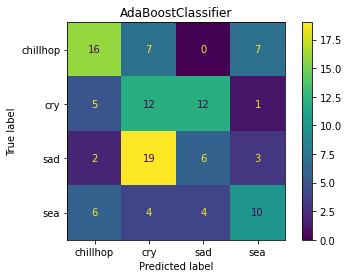

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.55      0.53      0.54        30
         cry       0.29      0.40      0.33        30
         sad       0.27      0.20      0.23        30
         sea       0.48      0.42      0.44        24

    accuracy                           0.39       114
   macro avg       0.40      0.39      0.39       114
weighted avg       0.39      0.39      0.38       114



# **4 label : chillhop,sad,sea,discourage (avg accuracy 47-56%)**

In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
#df = df[df.label != 'discourage']
df = df[df.label != 'cry']
df = df[df.label != 'work']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']

In [ ]:
df['label'].value_counts()

sad           100
chillhop      100
discourage    100
sea            80
Name: label, dtype: int64

## Scaled Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(266, 10)

In [ ]:
X_test.shape

(114, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
228,0.744,0.348,2,-15.550,1,0.0338,0.000008,0.1170,0.7530,86.992
331,0.877,0.397,0,-8.148,1,0.1160,0.000000,0.1720,0.4940,94.032
320,0.713,0.497,11,-7.418,0,0.0310,0.000025,0.0498,0.8920,91.000
74,0.683,0.410,6,-9.448,0,0.0261,0.000008,0.1110,0.0772,100.025
746,0.711,0.499,1,-9.584,1,0.0404,0.003570,0.1700,0.2440,119.894


In [ ]:
y_train.head()

,label
228,chillhop
331,sea
320,sea
74,sad
746,discourage


In [ ]:
y_train.value_counts()

label     
chillhop      70
discourage    70
sad           70
sea           56
dtype: int64

In [ ]:
y_test.value_counts()

label     
chillhop      30
discourage    30
sad           30
sea           24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.5263157894736842

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'logistic')

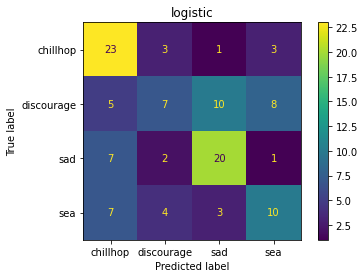

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.55      0.77      0.64        30
  discourage       0.44      0.23      0.30        30
         sad       0.59      0.67      0.62        30
         sea       0.45      0.42      0.43        24

    accuracy                           0.53       114
   macro avg       0.51      0.52      0.50       114
weighted avg       0.51      0.53      0.50       114



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.5789473684210527

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'Random forest')

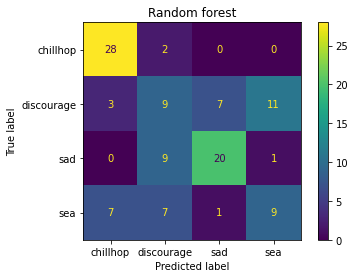

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.74      0.93      0.82        30
  discourage       0.33      0.30      0.32        30
         sad       0.71      0.67      0.69        30
         sea       0.43      0.38      0.40        24

    accuracy                           0.58       114
   macro avg       0.55      0.57      0.56       114
weighted avg       0.56      0.58      0.57       114



### XGBoost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test,y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.26%


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'XGBoost')

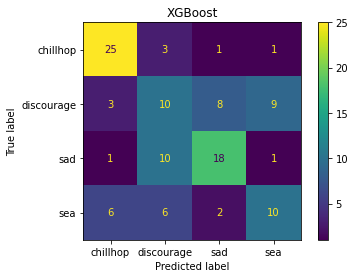

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("XGBoost")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.71      0.83      0.77        30
  discourage       0.34      0.33      0.34        30
         sad       0.62      0.60      0.61        30
         sea       0.48      0.42      0.44        24

    accuracy                           0.55       114
   macro avg       0.54      0.55      0.54       114
weighted avg       0.54      0.55      0.55       114



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.42105263157894735


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'DecisionTreeClassifier')

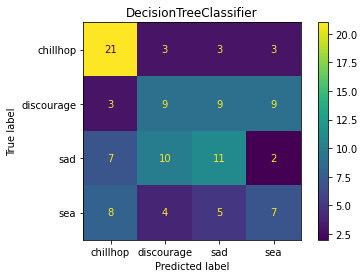

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.54      0.70      0.61        30
  discourage       0.35      0.30      0.32        30
         sad       0.39      0.37      0.38        30
         sea       0.33      0.29      0.31        24

    accuracy                           0.42       114
   macro avg       0.40      0.41      0.41       114
weighted avg       0.41      0.42      0.41       114



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.507 (0.071)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'AdaBoostClassifier')

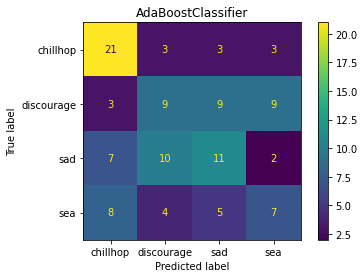

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.54      0.70      0.61        30
  discourage       0.35      0.30      0.32        30
         sad       0.39      0.37      0.38        30
         sea       0.33      0.29      0.31        24

    accuracy                           0.42       114
   macro avg       0.40      0.41      0.41       114
weighted avg       0.41      0.42      0.41       114



# **4 label : chillhop,sad,sea,working (avg accuracy 47-60%)**





In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'cry']
#df = df[df.label != 'work']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']

In [ ]:
df['label'].value_counts()

sad         100
chillhop    100
work        100
sea          80
Name: label, dtype: int64

## Scaled Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(266, 10)

In [ ]:
X_test.shape

(114, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
510,0.557,0.295,5,-12.706,1,0.0355,0.002010,0.1110,0.133,76.061
184,0.898,0.478,0,-8.890,0,0.0379,0.000158,0.1110,0.420,110.986
461,0.538,0.669,8,-5.140,1,0.0390,0.000000,0.0755,0.498,90.940
542,0.626,0.870,10,-3.826,1,0.0277,0.000028,0.0961,0.838,97.460
227,0.803,0.491,0,-9.950,0,0.0712,0.000000,0.1450,0.490,123.911


In [ ]:
y_train.head()

,label
510,work
184,chillhop
461,work
542,work
227,chillhop


In [ ]:
y_train.value_counts()

label   
chillhop    70
sad         70
work        70
sea         56
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
sad         30
work        30
sea         24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.5087719298245614

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

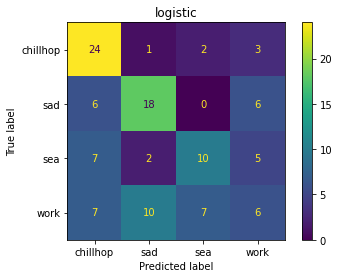

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.55      0.80      0.65        30
         sad       0.58      0.60      0.59        30
         sea       0.53      0.42      0.47        24
        work       0.30      0.20      0.24        30

    accuracy                           0.51       114
   macro avg       0.49      0.50      0.49       114
weighted avg       0.49      0.51      0.49       114



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.6052631578947368

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

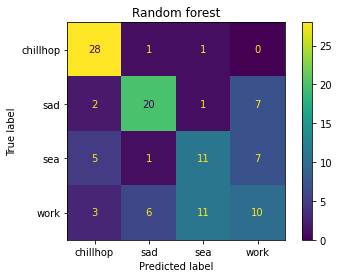

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.74      0.93      0.82        30
         sad       0.71      0.67      0.69        30
         sea       0.46      0.46      0.46        24
        work       0.42      0.33      0.37        30

    accuracy                           0.61       114
   macro avg       0.58      0.60      0.59       114
weighted avg       0.59      0.61      0.59       114



### XGBoost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test,y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.02%


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'XGBoost')

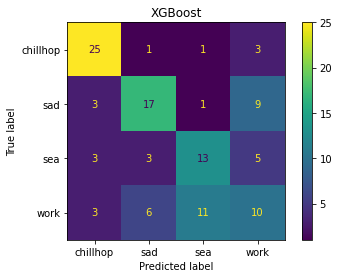

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("XGBoost")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.74      0.83      0.78        30
         sad       0.63      0.57      0.60        30
         sea       0.50      0.54      0.52        24
        work       0.37      0.33      0.35        30

    accuracy                           0.57       114
   macro avg       0.56      0.57      0.56       114
weighted avg       0.56      0.57      0.56       114



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.40350877192982454


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

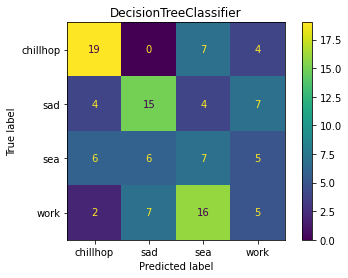

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.61      0.63      0.62        30
         sad       0.54      0.50      0.52        30
         sea       0.21      0.29      0.24        24
        work       0.24      0.17      0.20        30

    accuracy                           0.40       114
   macro avg       0.40      0.40      0.39       114
weighted avg       0.41      0.40      0.40       114



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.503 (0.082)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'sad', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

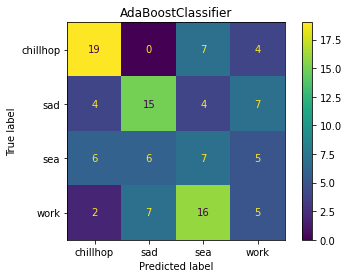

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.61      0.63      0.62        30
         sad       0.54      0.50      0.52        30
         sea       0.21      0.29      0.24        24
        work       0.24      0.17      0.20        30

    accuracy                           0.40       114
   macro avg       0.40      0.40      0.39       114
weighted avg       0.41      0.40      0.40       114



# **5 label : chillhop,sad,sea,chillout,lovesong (avg accuracy 48-53%)**

In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'cry']
df = df[df.label != 'work']
df = df[df.label != 'missed']
#df = df[df.label != 'chillout']
#df = df[df.label != 'lovesong']

In [ ]:
df['label'].value_counts()

sad         100
chillhop    100
chillout     80
sea          80
lovesong     60
Name: label, dtype: int64

## Scaled Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(294, 10)

In [ ]:
X_test.shape

(126, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
266,0.678,0.434,7,-11.384,1,0.1620,0.00000,0.0865,0.599,144.911
805,0.782,0.606,9,-11.764,1,0.0429,0.00000,0.2060,0.627,124.063
302,0.729,0.565,3,-6.382,1,0.0393,0.00000,0.1040,0.712,95.146
281,0.675,0.548,9,-9.225,1,0.0429,0.00254,0.1070,0.809,160.066
57,0.593,0.627,4,-7.553,1,0.0240,0.00471,0.1090,0.701,85.983


In [ ]:
y_train.head()

,label
266,chillhop
805,lovesong
302,sea
281,sea
57,sad


In [ ]:
y_train.value_counts()

label   
chillhop    70
sad         70
chillout    56
sea         56
lovesong    42
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
sad         30
chillout    24
sea         24
lovesong    18
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.4166666666666667

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'missed', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'logistic')

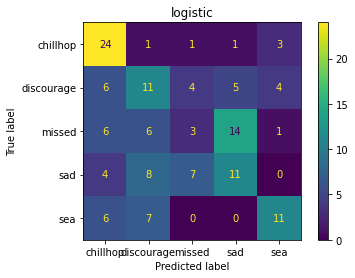

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.52      0.80      0.63        30
  discourage       0.33      0.37      0.35        30
      missed       0.20      0.10      0.13        30
         sad       0.35      0.37      0.36        30
         sea       0.58      0.46      0.51        24

    accuracy                           0.42       144
   macro avg       0.40      0.42      0.40       144
weighted avg       0.39      0.42      0.39       144



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.5555555555555556

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'chillout', 'lovesong', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

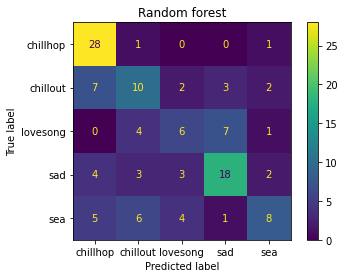

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.64      0.93      0.76        30
    chillout       0.42      0.42      0.42        24
    lovesong       0.40      0.33      0.36        18
         sad       0.62      0.60      0.61        30
         sea       0.57      0.33      0.42        24

    accuracy                           0.56       126
   macro avg       0.53      0.52      0.51       126
weighted avg       0.54      0.56      0.54       126



### XGBoost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test,y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 48.41%


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'chillout', 'lovesong', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'XGBoost')

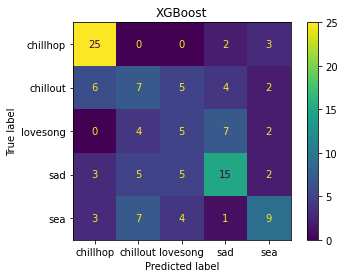

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("XGBoost")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.68      0.83      0.75        30
    chillout       0.30      0.29      0.30        24
    lovesong       0.26      0.28      0.27        18
         sad       0.52      0.50      0.51        30
         sea       0.50      0.38      0.43        24

    accuracy                           0.48       126
   macro avg       0.45      0.46      0.45       126
weighted avg       0.47      0.48      0.48       126



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.38095238095238093


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'chillout', 'lovesong', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

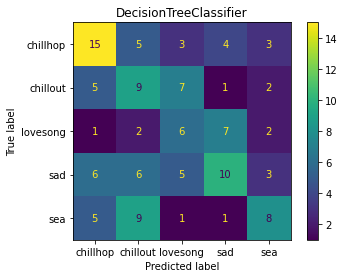

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.47      0.50      0.48        30
    chillout       0.29      0.38      0.33        24
    lovesong       0.27      0.33      0.30        18
         sad       0.43      0.33      0.38        30
         sea       0.44      0.33      0.38        24

    accuracy                           0.38       126
   macro avg       0.38      0.37      0.37       126
weighted avg       0.39      0.38      0.38       126



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.508 (0.090)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'chillout', 'lovesong', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

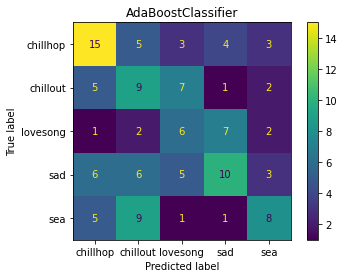

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.47      0.50      0.48        30
    chillout       0.29      0.38      0.33        24
    lovesong       0.27      0.33      0.30        18
         sad       0.43      0.33      0.38        30
         sea       0.44      0.33      0.38        24

    accuracy                           0.38       126
   macro avg       0.38      0.37      0.37       126
weighted avg       0.39      0.38      0.38       126



# **5 label : chillhop,sad,sea,chillout,missed (avg accuracy 45-49%)**

In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'cry']
df = df[df.label != 'work']
#df = df[df.label != 'missed']
#df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']

In [ ]:
df['label'].value_counts()

sad         100
chillhop    100
missed      100
chillout     80
sea          80
Name: label, dtype: int64

## Scaled Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(322, 10)

In [ ]:
X_test.shape

(138, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
27,0.476,0.338,5,-13.892,1,0.0371,0.000050,0.0931,0.230,167.958
332,0.812,0.556,10,-5.212,1,0.0614,0.000008,0.0854,0.559,104.000
586,0.422,0.712,9,-6.222,1,0.0336,0.000680,0.2680,0.385,170.163
651,0.652,0.459,11,-9.867,1,0.0566,0.000000,0.1160,0.477,92.018
235,0.689,0.505,2,-10.874,1,0.0612,0.000000,0.1200,0.363,128.079


In [ ]:
y_train.head()

,label
27,sad
332,sea
586,missed
651,missed
235,chillhop


In [ ]:
y_train.value_counts()

label   
chillhop    70
missed      70
sad         70
chillout    56
sea         56
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
missed      30
sad         30
chillout    24
sea         24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.4420289855072464

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'chillout', 'missed', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

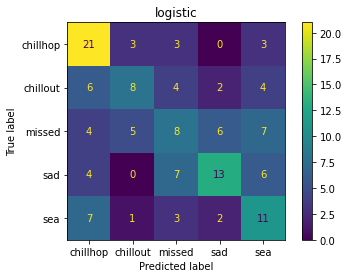

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.50      0.70      0.58        30
    chillout       0.47      0.33      0.39        24
      missed       0.32      0.27      0.29        30
         sad       0.57      0.43      0.49        30
         sea       0.35      0.46      0.40        24

    accuracy                           0.44       138
   macro avg       0.44      0.44      0.43       138
weighted avg       0.44      0.44      0.43       138



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.47101449275362317

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'chillout', 'missed', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

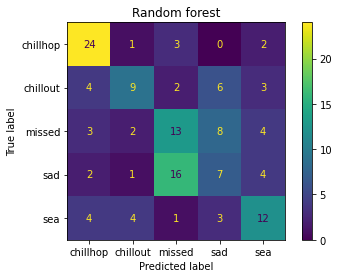

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.65      0.80      0.72        30
    chillout       0.53      0.38      0.44        24
      missed       0.37      0.43      0.40        30
         sad       0.29      0.23      0.26        30
         sea       0.48      0.50      0.49        24

    accuracy                           0.47       138
   macro avg       0.46      0.47      0.46       138
weighted avg       0.46      0.47      0.46       138



### XGBoost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test,y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 48.55%


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'chillout', 'missed', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'XGBoost')

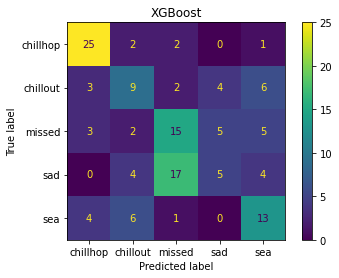

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("XGBoost")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.71      0.83      0.77        30
    chillout       0.39      0.38      0.38        24
      missed       0.41      0.50      0.45        30
         sad       0.36      0.17      0.23        30
         sea       0.45      0.54      0.49        24

    accuracy                           0.49       138
   macro avg       0.46      0.48      0.46       138
weighted avg       0.47      0.49      0.47       138



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4057971014492754


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'chillout', 'missed', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

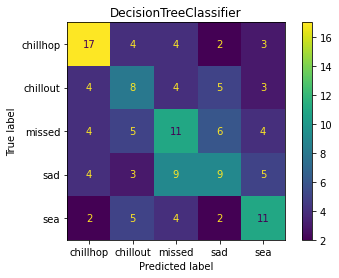

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.55      0.57      0.56        30
    chillout       0.32      0.33      0.33        24
      missed       0.34      0.37      0.35        30
         sad       0.38      0.30      0.33        30
         sea       0.42      0.46      0.44        24

    accuracy                           0.41       138
   macro avg       0.40      0.40      0.40       138
weighted avg       0.40      0.41      0.40       138



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.448 (0.057)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'chillout', 'missed', 'sad', 'sea'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

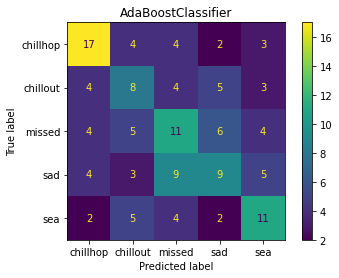

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.55      0.57      0.56        30
    chillout       0.32      0.33      0.33        24
      missed       0.34      0.37      0.35        30
         sad       0.38      0.30      0.33        30
         sea       0.42      0.46      0.44        24

    accuracy                           0.41       138
   macro avg       0.40      0.40      0.40       138
weighted avg       0.40      0.41      0.40       138



# **5 label : chillhop,sad,sea,tired,cry (avg accuracy 39-50%)**

In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
#df = df[df.label != 'tired']
df = df[df.label != 'discourage']
#df = df[df.label != 'cry']
df = df[df.label != 'work']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']

In [ ]:
df['label'].value_counts()

sad         100
chillhop    100
tired       100
cry         100
sea          80
Name: label, dtype: int64

## Scaled Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(336, 10)

In [ ]:
X_test.shape

(144, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
94,0.521,0.501,9,-8.259,1,0.0345,0.00000,0.1270,0.311,149.978
288,0.602,0.736,1,-6.230,0,0.0316,0.00243,0.1150,0.710,117.068
75,0.337,0.696,7,-5.094,1,0.0366,0.00000,0.1200,0.184,160.076
292,0.629,0.553,7,-5.162,0,0.4030,0.00000,0.1060,0.544,125.912
420,0.676,0.726,11,-4.953,0,0.0339,0.00000,0.0459,0.734,116.985


In [ ]:
y_train.head()

,label
94,sad
288,sea
75,sad
292,sea
420,tired


In [ ]:
y_train.value_counts()

label   
chillhop    70
cry         70
sad         70
tired       70
sea         56
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
cry         30
sad         30
tired       30
sea         24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.4513888888888889

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad', 'sea', 'tired'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

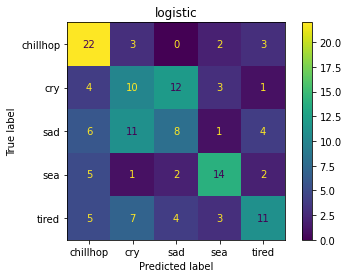

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.52      0.73      0.61        30
         cry       0.31      0.33      0.32        30
         sad       0.31      0.27      0.29        30
         sea       0.61      0.58      0.60        24
       tired       0.52      0.37      0.43        30

    accuracy                           0.45       144
   macro avg       0.46      0.46      0.45       144
weighted avg       0.45      0.45      0.44       144



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.4166666666666667

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad', 'sea', 'tired'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

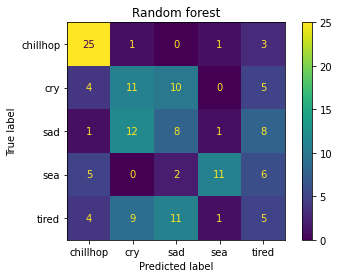

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.64      0.83      0.72        30
         cry       0.33      0.37      0.35        30
         sad       0.26      0.27      0.26        30
         sea       0.79      0.46      0.58        24
       tired       0.19      0.17      0.18        30

    accuracy                           0.42       144
   macro avg       0.44      0.42      0.42       144
weighted avg       0.43      0.42      0.41       144



### XGBoost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test,y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 40.97%


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad', 'sea', 'tired'], dtype='<U8')

Text(0.5, 1.0, 'XGBoost')

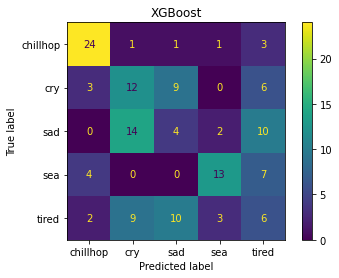

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("XGBoost")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.73      0.80      0.76        30
         cry       0.33      0.40      0.36        30
         sad       0.17      0.13      0.15        30
         sea       0.68      0.54      0.60        24
       tired       0.19      0.20      0.19        30

    accuracy                           0.41       144
   macro avg       0.42      0.42      0.41       144
weighted avg       0.41      0.41      0.41       144



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3680555555555556


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad', 'sea', 'tired'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

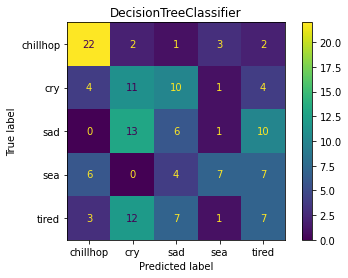

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.63      0.73      0.68        30
         cry       0.29      0.37      0.32        30
         sad       0.21      0.20      0.21        30
         sea       0.54      0.29      0.38        24
       tired       0.23      0.23      0.23        30

    accuracy                           0.37       144
   macro avg       0.38      0.36      0.36       144
weighted avg       0.37      0.37      0.36       144



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.386 (0.082)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'cry', 'sad', 'sea', 'tired'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

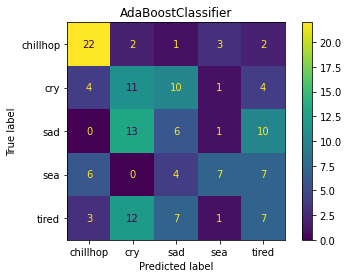

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.63      0.73      0.68        30
         cry       0.29      0.37      0.32        30
         sad       0.21      0.20      0.21        30
         sea       0.54      0.29      0.38        24
       tired       0.23      0.23      0.23        30

    accuracy                           0.37       144
   macro avg       0.38      0.36      0.36       144
weighted avg       0.37      0.37      0.36       144



# **5 label : chillhop,sad,sea,lovesong,work (avg accuracy 32-48%)**

In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
df = df[df.label != 'discourage']
df = df[df.label != 'cry']
#df = df[df.label != 'work']
df = df[df.label != 'missed']
df = df[df.label != 'chillout']
#df = df[df.label != 'lovesong']

In [ ]:
df['label'].value_counts()

sad         100
chillhop    100
work        100
sea          80
lovesong     60
Name: label, dtype: int64

## Scaled Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(308, 10)

In [ ]:
X_test.shape

(132, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
474,0.423,0.713,3,-5.021,1,0.0416,0.000000,0.0884,0.471,170.087
218,0.685,0.523,11,-8.566,1,0.0495,0.000000,0.1120,0.298,149.858
502,0.707,0.720,11,-5.610,1,0.1510,0.000000,0.0767,0.905,99.987
470,0.523,0.615,6,-6.549,1,0.0398,0.000000,0.1450,0.534,162.059
482,0.724,0.729,4,-6.949,1,0.0373,0.000001,0.1430,0.685,95.030


In [ ]:
y_train.head()

,label
474,work
218,chillhop
502,work
470,work
482,work


In [ ]:
y_train.value_counts()

label   
chillhop    70
sad         70
work        70
sea         56
lovesong    42
dtype: int64

In [ ]:
y_test.value_counts()

label   
chillhop    30
sad         30
work        30
sea         24
lovesong    18
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.45454545454545453

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'lovesong', 'sad', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'logistic')

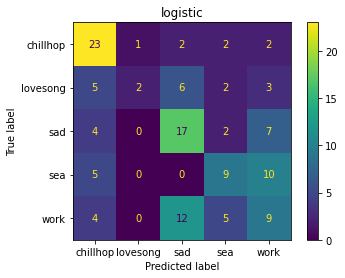

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.56      0.77      0.65        30
    lovesong       0.67      0.11      0.19        18
         sad       0.46      0.57      0.51        30
         sea       0.45      0.38      0.41        24
        work       0.29      0.30      0.30        30

    accuracy                           0.45       132
   macro avg       0.49      0.42      0.41       132
weighted avg       0.47      0.45      0.43       132



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.4696969696969697

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'lovesong', 'sad', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'Random forest')

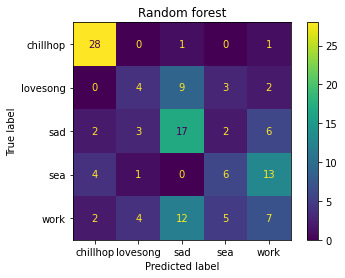

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.78      0.93      0.85        30
    lovesong       0.33      0.22      0.27        18
         sad       0.44      0.57      0.49        30
         sea       0.38      0.25      0.30        24
        work       0.24      0.23      0.24        30

    accuracy                           0.47       132
   macro avg       0.43      0.44      0.43       132
weighted avg       0.44      0.47      0.45       132



### XGBoost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test,y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 42.42%


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'lovesong', 'sad', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'XGBoost')

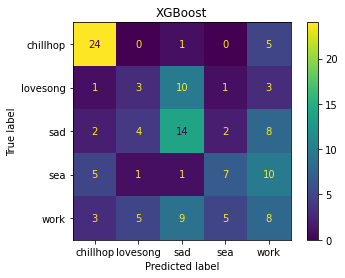

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("XGBoost")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.69      0.80      0.74        30
    lovesong       0.23      0.17      0.19        18
         sad       0.40      0.47      0.43        30
         sea       0.47      0.29      0.36        24
        work       0.24      0.27      0.25        30

    accuracy                           0.42       132
   macro avg       0.40      0.40      0.39       132
weighted avg       0.42      0.42      0.41       132



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3560606060606061


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'lovesong', 'sad', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'DecisionTreeClassifier')

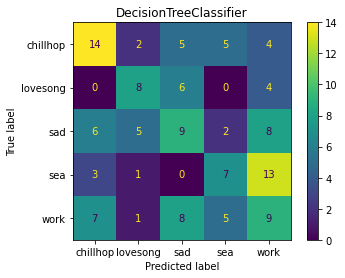

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.47      0.47      0.47        30
    lovesong       0.47      0.44      0.46        18
         sad       0.32      0.30      0.31        30
         sea       0.37      0.29      0.33        24
        work       0.24      0.30      0.26        30

    accuracy                           0.36       132
   macro avg       0.37      0.36      0.36       132
weighted avg       0.36      0.36      0.36       132



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.423 (0.076)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'lovesong', 'sad', 'sea', 'work'], dtype='<U8')

Text(0.5, 1.0, 'AdaBoostClassifier')

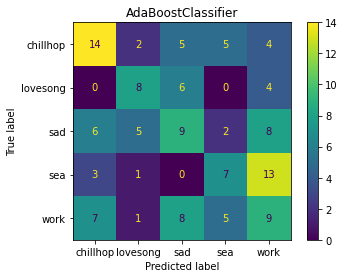

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.47      0.47      0.47        30
    lovesong       0.47      0.44      0.46        18
         sad       0.32      0.30      0.31        30
         sea       0.37      0.29      0.33        24
        work       0.24      0.30      0.26        30

    accuracy                           0.36       132
   macro avg       0.37      0.36      0.36       132
weighted avg       0.36      0.36      0.36       132



# **5 label : chillhop,sad,sea,discourage,miss (avg accuracy %)**

In [ ]:
df = pd.read_csv('Full_spotify_data_senior_project64.csv')
df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,popularity,year,label
0,6s8JOwADhfEbqGqyKshMJE,0.386,0.500,2,-7.230,1,0.0371,0.0,0.0878,0.336,159.807,42.0,2013.0,sad
1,4N4VmSZhReQniqoakHBEvF,0.490,0.422,8,-7.775,1,0.0288,0.0,0.2240,0.348,129.772,39.0,2012.0,sad
2,7ETxkXmmEjVnloAXYzNUoH,0.818,0.634,8,-5.137,1,0.1260,0.0,0.1100,0.794,84.981,47.0,2013.0,sad
3,5AwQir16Hh3nHBLyGuhTjU,0.601,0.599,7,-5.549,1,0.0373,0.0,0.1530,0.577,67.998,49.0,2018.0,sad
4,6807mPDUKTRWDWiXaXBhke,0.699,0.594,0,-6.726,1,0.0418,0.0,0.0985,0.338,133.989,43.0,2007.0,sad


In [ ]:
df = df[df.label != 'tired']
#df = df[df.label != 'discourage']
df = df[df.label != 'cry']
df = df[df.label != 'work']
#df = df[df.label != 'missed']
df = df[df.label != 'chillout']
df = df[df.label != 'lovesong']

In [ ]:
df['label'].value_counts()

sad           100
chillhop      100
missed        100
discourage    100
sea            80
Name: label, dtype: int64

## Scaled Data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[features_for_mood ])

MinMaxScaler()

In [ ]:
X=scaler.transform(df[features_for_mood ])

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X= df[features_for_mood]
y=df[['label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=10)

In [ ]:
X_train.shape

(336, 10)

In [ ]:
X_test.shape

(144, 10)

In [ ]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo
705,0.689,0.499,9,-7.029,1,0.0690,0.000000,0.2850,0.413,140.009
181,0.378,0.661,7,-6.221,0,0.0614,0.000000,0.1570,0.509,118.055
568,0.501,0.648,0,-5.771,1,0.0272,0.000002,0.0913,0.504,180.043
278,0.860,0.352,2,-15.719,0,0.4120,0.000000,0.5270,0.734,84.048
241,0.929,0.471,0,-9.814,0,0.4140,0.000006,0.0928,0.389,127.036


In [ ]:
y_train.head()

,label
705,discourage
181,chillhop
568,missed
278,chillhop
241,chillhop


In [ ]:
y_train.value_counts()

label     
chillhop      70
discourage    70
missed        70
sad           70
sea           56
dtype: int64

In [ ]:
y_test.value_counts()

label     
chillhop      30
discourage    30
missed        30
sad           30
sea           24
dtype: int64

In [ ]:
#Ravel
y_train_r=y_train.values.ravel()
y_test_r=y_test.values.ravel()

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_grid = LogisticRegression(multi_class='ovr',max_iter=500,C=1,penalty='l1',solver='liblinear')
log_reg_grid.fit(X_train,y_train_r)

LogisticRegression(C=1, max_iter=500, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
#Prediction and accuracy
y_pred = log_reg_grid.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.4166666666666667

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'missed', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'logistic')

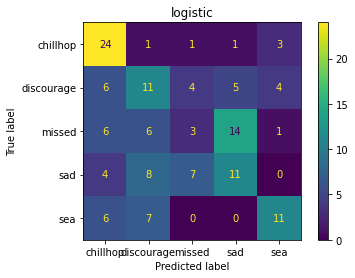

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_log = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_log, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("logistic")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.52      0.80      0.63        30
  discourage       0.33      0.37      0.35        30
      missed       0.20      0.10      0.13        30
         sad       0.35      0.37      0.36        30
         sea       0.58      0.46      0.51        24

    accuracy                           0.42       144
   macro avg       0.40      0.42      0.40       144
weighted avg       0.39      0.42      0.39       144



### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'gini',max_features='log2',n_estimators=500)
rfc.fit(X_train, y_train_r)

# Make predictions for the test set
y_pred = rfc.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred)

0.4305555555555556

In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'missed', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'Random forest')

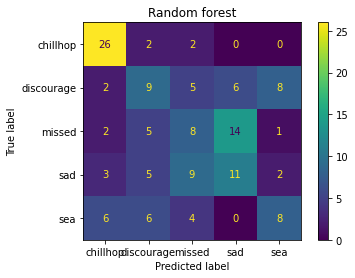

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("Random forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.67      0.87      0.75        30
  discourage       0.33      0.30      0.32        30
      missed       0.29      0.27      0.28        30
         sad       0.35      0.37      0.36        30
         sea       0.42      0.33      0.37        24

    accuracy                           0.43       144
   macro avg       0.41      0.43      0.42       144
weighted avg       0.41      0.43      0.42       144



### XGBoost 

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train, y_train_r)

y_pred = xgb_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test,y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 45.83%


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'missed', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'XGBoost')

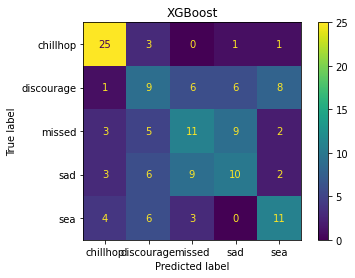

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("XGBoost")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.69      0.83      0.76        30
  discourage       0.31      0.30      0.31        30
      missed       0.38      0.37      0.37        30
         sad       0.38      0.33      0.36        30
         sea       0.46      0.46      0.46        24

    accuracy                           0.46       144
   macro avg       0.45      0.46      0.45       144
weighted avg       0.44      0.46      0.45       144



###DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3611111111111111


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'missed', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'DecisionTreeClassifier')

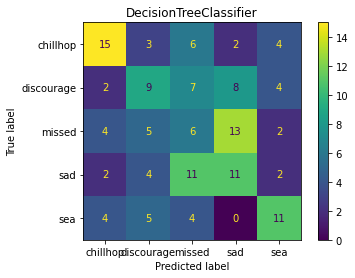

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("DecisionTreeClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.56      0.50      0.53        30
  discourage       0.35      0.30      0.32        30
      missed       0.18      0.20      0.19        30
         sad       0.32      0.37      0.34        30
         sea       0.48      0.46      0.47        24

    accuracy                           0.36       144
   macro avg       0.38      0.36      0.37       144
weighted avg       0.37      0.36      0.37       144



###AdaBoostClassifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.388 (0.067)


In [ ]:
from sklearn.utils.multiclass import unique_labels
labels = unique_labels(y_test, y_pred)
labels

array(['chillhop', 'discourage', 'missed', 'sad', 'sea'], dtype='<U10')

Text(0.5, 1.0, 'AdaBoostClassifier')

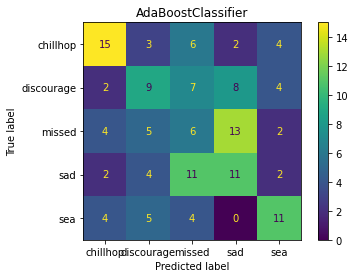

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
cmd.ax_.set_title("AdaBoostClassifier")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    chillhop       0.56      0.50      0.53        30
  discourage       0.35      0.30      0.32        30
      missed       0.18      0.20      0.19        30
         sad       0.32      0.37      0.34        30
         sea       0.48      0.46      0.47        24

    accuracy                           0.36       144
   macro avg       0.38      0.36      0.37       144
weighted avg       0.37      0.36      0.37       144

